<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/interpolation_splines_uno_x_uno_con_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equation of the trend line: y = -0.000679x + 0.458888
Percentage change over the given time period: -5.14%


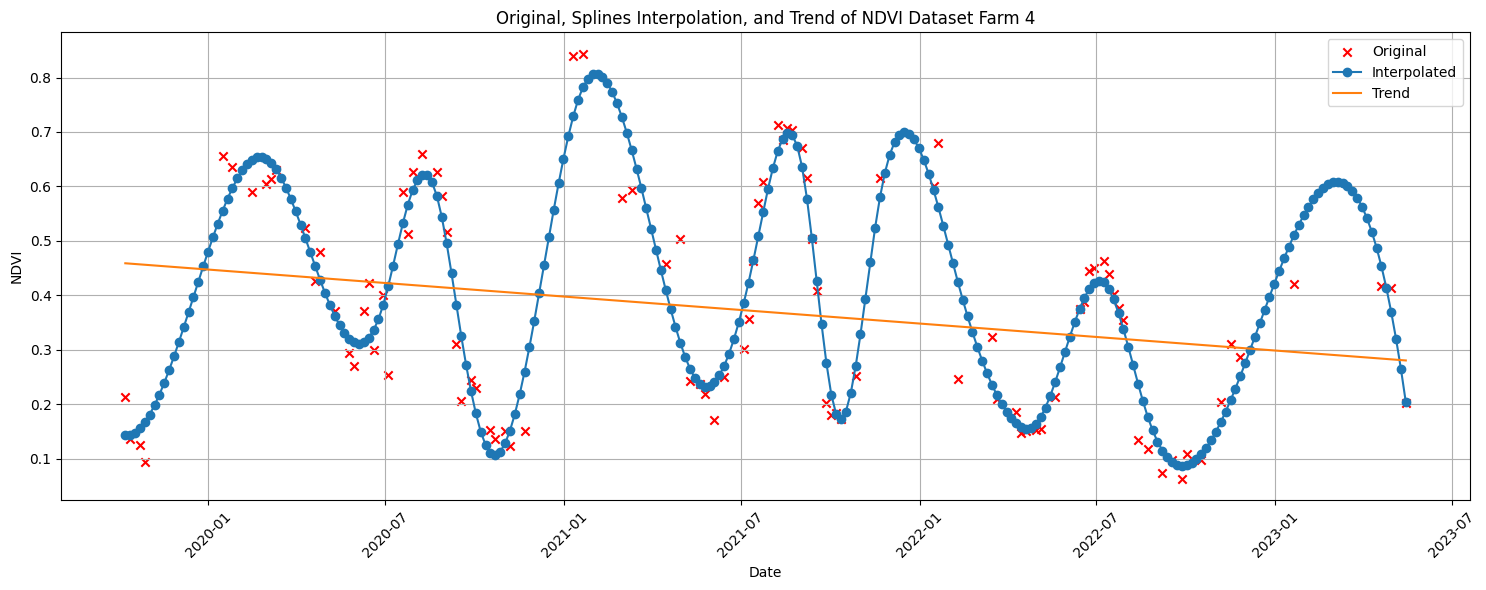

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

#df = pd.read_csv('/content/S2-2019-NOV2022-CORRECT-OUT.csv')
df = pd.read_csv('/content/farm4.csv')
#/content/S2-2019-JAN2023-CORRECT-OUT.c/sv

######

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

#########



# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
#

df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s_values = [0.35]
#s_values = [0.35]

interpolated_values = []

for s in s_values:
    spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=s)
    interpolated_values.append(spline(x))

# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()

# Calculate the trend using linear regression
X = df_trend.index.values.reshape(-1, 1)
y = df_trend["NDVI"]
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

#################################### Shown TREND  ##############################################################

# Print the equation of the trend line (y = mx + b)
slope = model.coef_[0]
intercept = model.intercept_
print("Equation of the trend line: y = {:.6f}x + {:.6f}".format(slope, intercept))

# Calculate the percentage change of the NDVI values over the given time period
initial_ndvi = df_trend["NDVI"].iloc[0]
final_ndvi = df_trend["NDVI"].iloc[-1]
percentage_change = ((final_ndvi - initial_ndvi) / initial_ndvi) * 100
print("Percentage change over the given time period: {:.2f}%".format(percentage_change))

##############################################################################################################################3



##################################### export csv file ########################################################3

# Create a DataFrame with the interpolated values and corresponding dates
interpolated_df = pd.DataFrame({"Date": date_range, "NDVI": interpolated_values[0]})

# Save the DataFrame to a CSV file
interpolated_df.to_csv("/content/interpolated_data.csv", index=False)

##########################################################################################


plt.figure(figsize=(15, 6))
# Plot the original data, interpolated values, and trend
plt.scatter(df["Date"], df["NDVI"], marker ="x", label="Original", color="red")
plt.plot(df["Date"], interpolated_values[0][:len(df)], "o-", label="Interpolated")

#plt.plot(df["Date"], df["NDVI"], "x-", label="Original", color="green")
#plt.plot(df["Date"], interpolated_values[0][:len(df)], "o-", label="Interpolated")

plt.plot(df_trend["Date"], trend, label="Trend")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Dataset Farm 4")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
